<h1> Problema de las N-reinas: implementaciones y acercamientos a algoritmos orientados a la resolución del problema.</h1>
<p><h6 align='center'> Buscamos implementar y contrastar distintos algoritmos que nos permitieran resolver el 
problema de las N-reinas con las restricciones originales del problema, a su vez indagamos en 
las distintas tecnicas de solución que se han propuesto hasta el dia de hoy y como muchos han optado
por algoritmos que satisfacen este problema viendo la aplicabilidad en distintos campos</h6></p>

<p>Los algoritmos implementados en la resolución del problema de las N reinas, fueron los siguientes:</p>
<li> Implementación del algoritmo de sosic y jun gu </li>
<li> Implementación del algoritmo Hill climbing juntos con tres variaciones en busca del minimo conflicto</li>
<li> Implementación del algoritmo backtracking y una variación optimizando con branch and bound</li>


<h3>Implementación del algoritmo de Sosic y Jun Gu</h3>

<p>A continuación mostramos resultados obtenidos en la ejecución del algoritmo Sosic y Jun Gu variando el numero N de reinas, en esta caso consideraremos, mediremos tiempo que tarda el programa en asignarle una ubicación a las N reinas y tambien revisaremos el consumo de memoria.</p>
<b>Tiempo de ejecución para N reinas:</b>

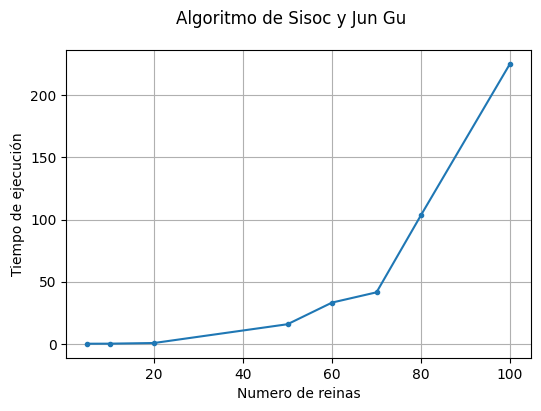

In [194]:
import csv
import matplotlib.pyplot as plt

dataTimeSosicgau = csv.reader(open('AlgorithmTimeData/Sosic_Gu.csv'))
results = [] #primer arreglo indexado corresponde al tiempo y el segundo a a la  salida de tiempo del programa
for row in dataTimeSosicgau:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])
time = [float(results[0][i]) for i in range(1,len(results[0]))]
n_queens = [int(results[1][i]) for i in range(1,len(results[1]))]
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(n_queens,time,marker='.')
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")

plt.suptitle("Algoritmo de Sisoc y Jun Gu")
plt.show()


<b>Consumo de memoria del algoritmo Sosic y Jun Gu variando el numero N de reinas a asignar en el tablero:</b>

In [210]:
import pandas as pd

tiempos_ejec = [['','','','','','','','','','','Prom.:'],[0.0068,0.0073,0.0075,0.0083,0.0075,0.0078,0.0080,0.0071,0.0087,0.0119,0.0081],[0.0543,0.0652,0.0507,0.0523,0.0524,0.0504,0.0617,0.0498,0.0510,0.0649,0.0552],[0.5513,0.5687,0.5205,0.5311,0.5102,0.5191,1.0378,0.5405,0.5246,0.5512,0.5855],[16.4166,15.5497,15.2237,15.5749,15.6378,14.9747,14.6506,14.6884,15.0245,19.3652,15.7106],[30.3789,36.8022,33.6166,33.4303,32.099,32.5657,33.1107,33.5335,33.3450,31.3472,32.5233],[55.3879,54.6672,55.1413,62.3840,59.1726,54.0110,57.4852,57.5426,54.1711,64.8226,57.4785],[120.8846,91.9703,118.2620,99.2757,98.2921,108.1222,93.2932,112.1614,98.9293,94.6908,103.588],[217.3795,218.488,209.2160,211.501,274.0515,239.213,232.6507,282.7064,268.6751,248.6715,232]]
n_reinas = ['N:',5,10,20,50,60,70,80,100]
df = pd.DataFrame()
df[n_reinas[0]] = tiempos_ejec[0]
df[n_reinas[1]] = tiempos_ejec[1]
df[n_reinas[2]] = tiempos_ejec[2]
df[n_reinas[3]] = tiempos_ejec[3]
df[n_reinas[4]] = tiempos_ejec[4]
df[n_reinas[5]] = tiempos_ejec[5]
df[n_reinas[6]] = tiempos_ejec[6]
df[n_reinas[7]] = tiempos_ejec[7]
df[n_reinas[8]] = tiempos_ejec[8]

print(df)

    N-reinas:       5      10      20       50       60       70        80  \
0              0.0068  0.0543  0.5513  16.4166  30.3789  55.3879  120.8846   
1              0.0073  0.0652  0.5687  15.5497  36.8022  54.6672   91.9703   
2              0.0075  0.0507  0.5205  15.2237  33.6166  55.1413  118.2620   
3              0.0083  0.0523  0.5311  15.5749  33.4303  62.3840   99.2757   
4              0.0075  0.0524  0.5102  15.6378  32.0990  59.1726   98.2921   
5              0.0078  0.0504  0.5191  14.9747  32.5657  54.0110  108.1222   
6              0.0080  0.0617  1.0378  14.6506  33.1107  57.4852   93.2932   
7              0.0071  0.0498  0.5405  14.6884  33.5335  57.5426  112.1614   
8              0.0087  0.0510  0.5246  15.0245  33.3450  54.1711   98.9293   
9              0.0119  0.0649  0.5512  19.3652  31.3472  64.8226   94.6908   
10  Promedio:  0.0081  0.0552  0.5855  15.7106  32.5233  57.4785  103.5880   

         100  
0   217.3795  
1   218.4880  
2   209.2160  
3  

<h3>Implementación del algoritmos Hill Climbing junto con dos variantes</h3>
<h4>Implementación primer version algoritmo Hill Climbing</h4>

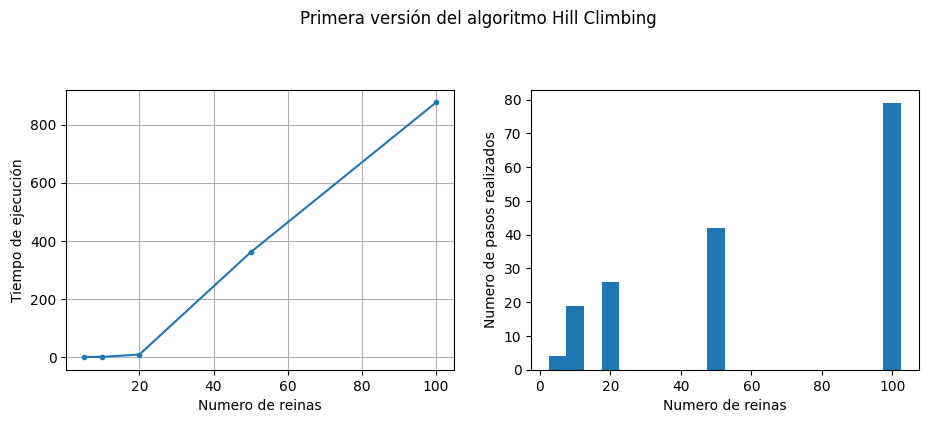

In [183]:
import csv
import matplotlib.pyplot as plt
dataHillClimbing = csv.reader(open('AlgorithmTimeData/HillCimbing.csv'))
results = [] #primer arreglo indexado corresponde al tiempo, el segundo salida de tiempo del programa y tercero el numero de pasos ejecutados
for row in dataHillClimbing:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])
time = [float(results[0][i]) for i in range(1,len(results[0]))]
n_queens = [float(results[1][i]) for i in range(1,len(results[1]))]
steps = [float(results[2][i]) for i in range(1,len(results[2]))]
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
plt.grid()
plt.plot(n_queens,time,marker='.')
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")
plt.subplot(2,2,2)
plt.bar(n_queens,steps,width=5)
plt.ylabel("Numero de pasos realizados")
plt.xlabel("Numero de reinas")
plt.suptitle("Primera versión del algoritmo Hill Climbing")
plt.show()



<h4>Implementacion primera variación algoritmo Hill Climbing</h4>

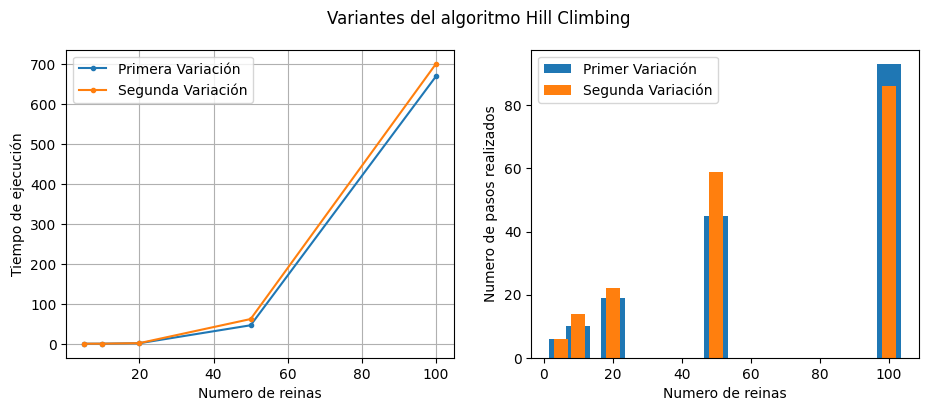

In [182]:
import csv
dataHillClimbing_Variante = csv.reader(open('AlgorithmTimeData/HillClimbing_variantes.csv'))
results = [] 
for row in dataHillClimbing_Variante:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])

n_queens = [int(results[len(results)-1][i]) for i in range(1,len(results[1]))]
time_primeraVer = [float(results[0][i]) for i in range(1,len(results[0]))]
steps_primeraVer = [float(results[1][i]) for i in range(1,len(results[2]))]
time_segundaVer = [float(results[2][i]) for i in range(1,len(results[0]))]
setps_segundaVer = [float(results[3][i]) for i in range(1,len(results[2]))]

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.grid()
plt.plot(n_queens,time_primeraVer,marker='.',label="Primera Variación")
plt.plot(n_queens,time_segundaVer,marker='.',label="Segunda Variación")
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")
plt.legend()

plt.subplot(1,2,2)
plt.bar(n_queens,steps_primeraVer,width=7,label="Primer Variación")
plt.bar(n_queens,setps_segundaVer,width=4,label="Segunda Variación")
plt.ylabel("Numero de pasos realizados")
plt.xlabel("Numero de reinas")
plt.legend()

plt.suptitle("Variantes del algoritmo Hill Climbing")
plt.show()